# Eric Yarger, Classification Analysis

In [2]:
# Import Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, chi2


In [3]:
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [4]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


# Data Preparation

### Step 1 : Load the Data and initial visualization 

In [5]:
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

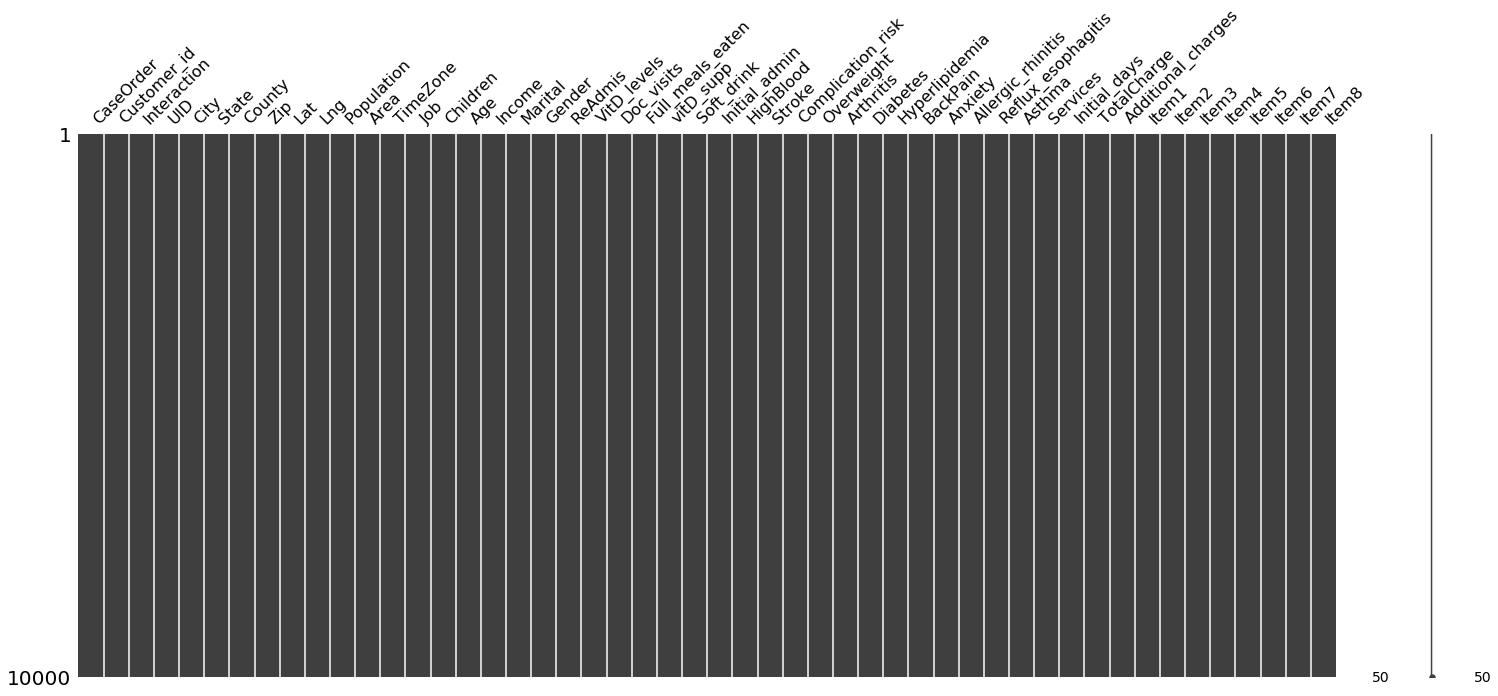

In [6]:
msno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5E6CBFDC8>,
      dtype=object)

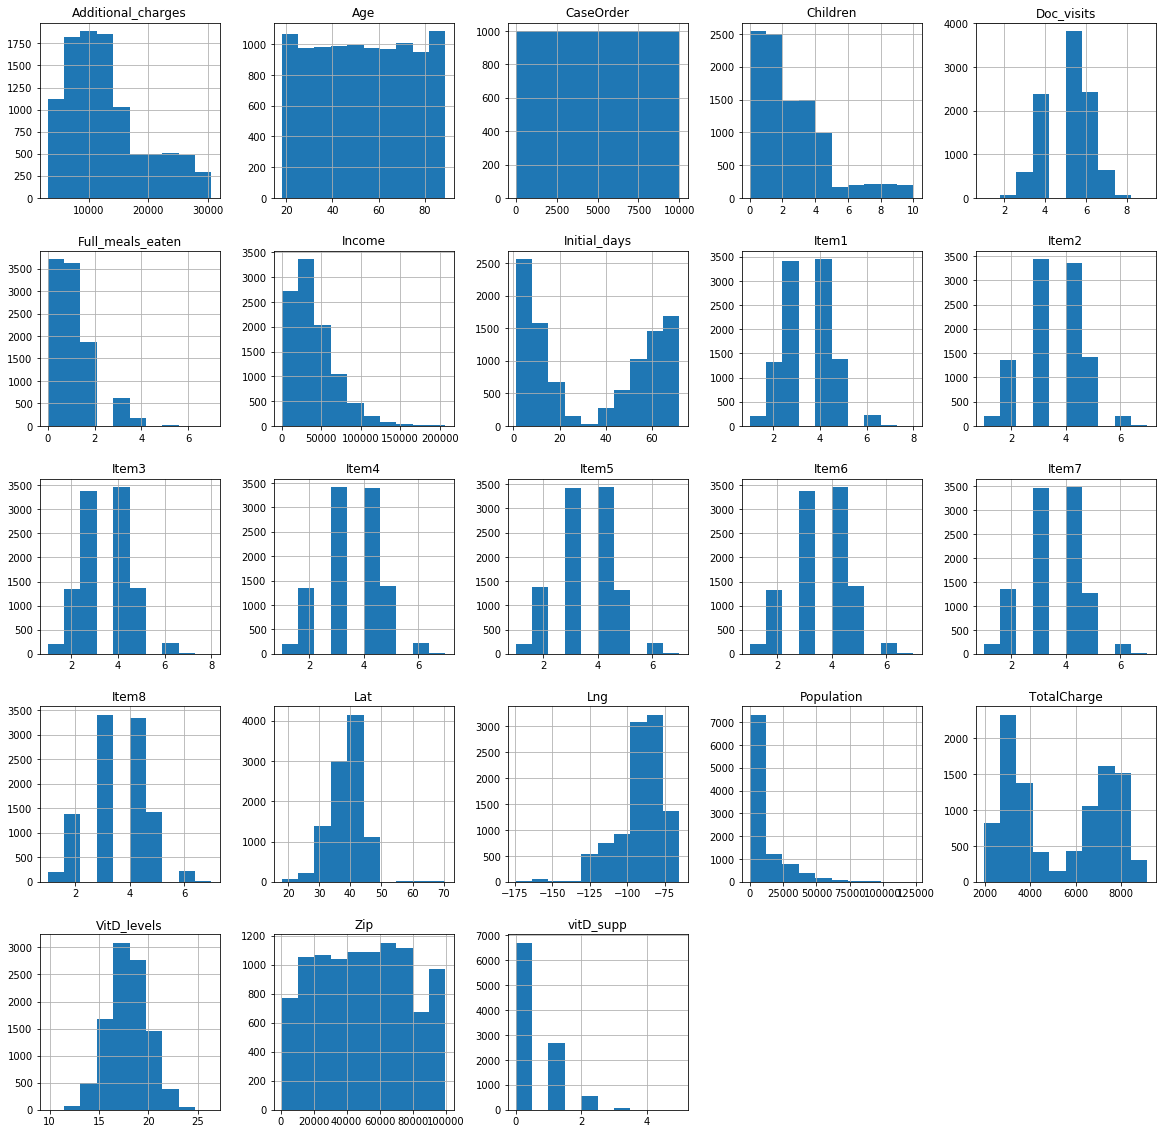

In [7]:
df.hist(figsize=(20,20))

### Step 2 : Rename columns and create Pairplots

In [8]:
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_vis','Item4':'Reliability','Item5':'Options','Item6':'Hours','Item7':'Courteous','Item8':'Listen'},inplace=True)

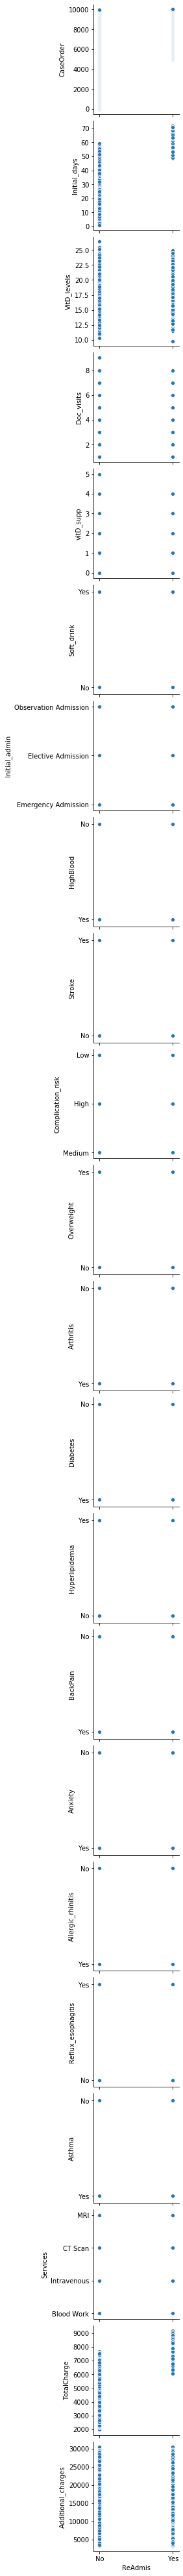

In [9]:
sns.pairplot(df, x_vars=['ReAdmis'], y_vars=['CaseOrder','Initial_days','VitD_levels','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services','TotalCharge','Additional_charges'])

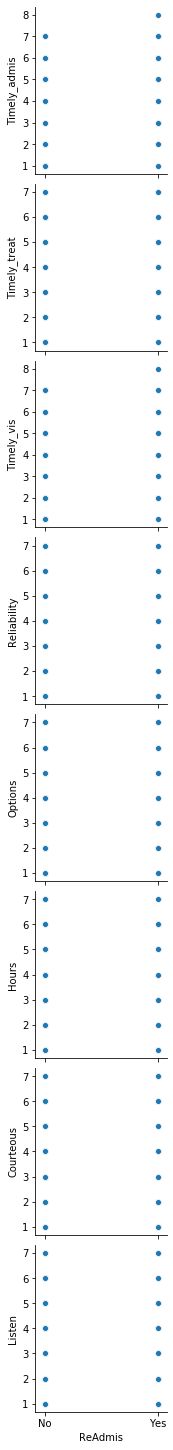

In [10]:
sns.pairplot(df, x_vars=['ReAdmis'], y_vars=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'])

### Step 3 : Address missing data, duplicates, and outliers.  ReAdmis replace Yes/No with 1/0


In [11]:
# Calculate Z-scores, remove Outliers Z > 3

#df.isnull().sum()

In [12]:
df.duplicated().any()

False

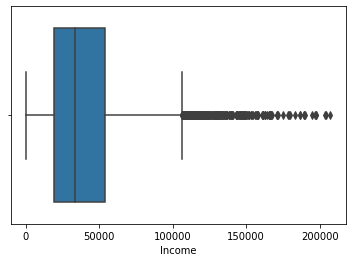

In [13]:
sns.boxplot(df['Income'])

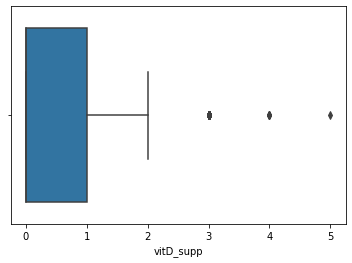

In [14]:
sns.boxplot(df['vitD_supp'])

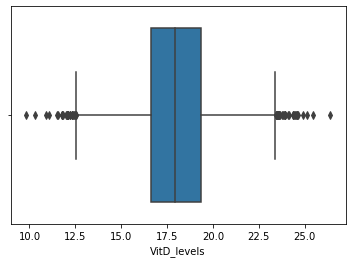

In [15]:
sns.boxplot(df['VitD_levels'])

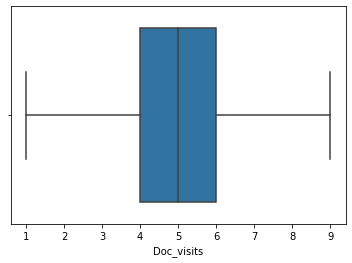

In [16]:
sns.boxplot(df['Doc_visits'])

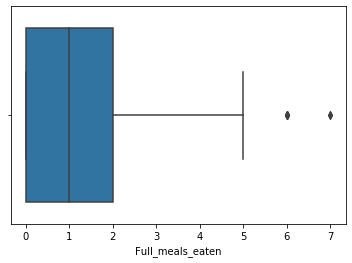

In [17]:
sns.boxplot(df['Full_meals_eaten'])

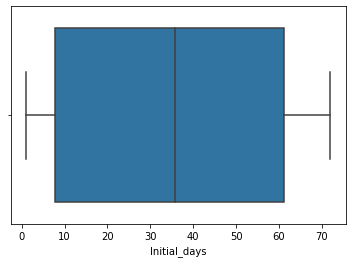

In [18]:
sns.boxplot(df['Initial_days'])

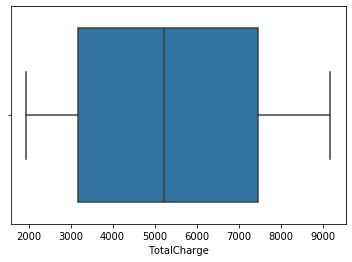

In [19]:
sns.boxplot(df['TotalCharge'])

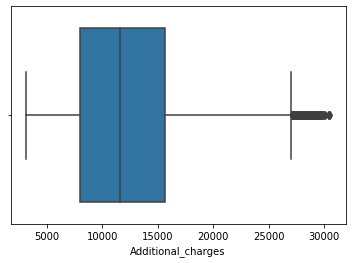

In [20]:
sns.boxplot(df['Additional_charges'])

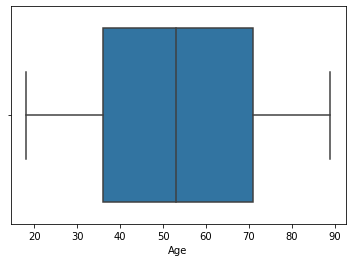

In [21]:
sns.boxplot(df['Age'])

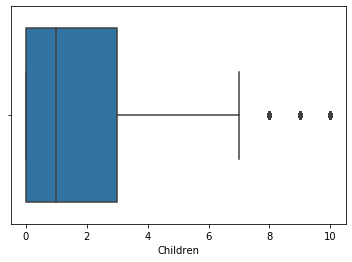

In [22]:
sns.boxplot(df['Children'])

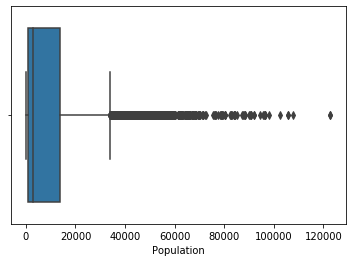

In [23]:
sns.boxplot(df['Population'])

In [24]:
# Outlier removal method via Z-score, Code reference (Bushmanov, 2019)

num_data = df.select_dtypes(include=['number'])
cat_data = df.select_dtypes(exclude=['number'])

In [25]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [26]:
df = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

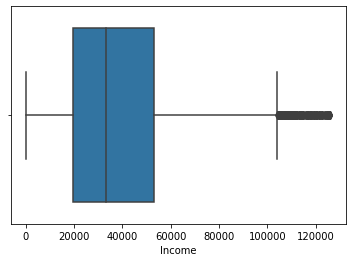

In [27]:
sns.boxplot(df['Income'])

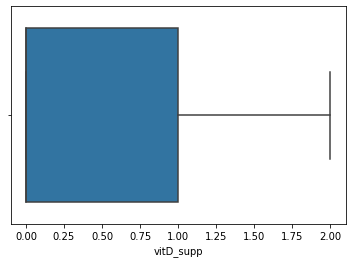

In [28]:
sns.boxplot(df['vitD_supp'])

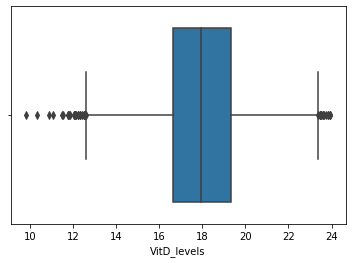

In [29]:
sns.boxplot(df['VitD_levels'])

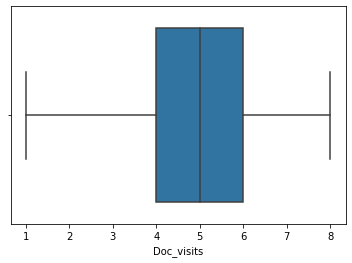

In [30]:
sns.boxplot(df['Doc_visits'])

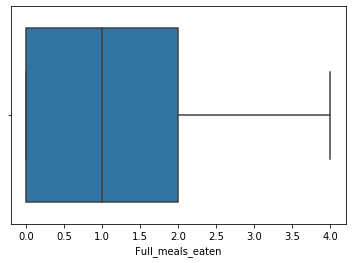

In [31]:
sns.boxplot(df['Full_meals_eaten'])

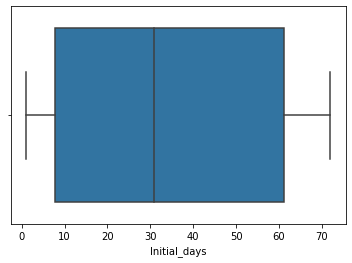

In [32]:
sns.boxplot(df['Initial_days'])

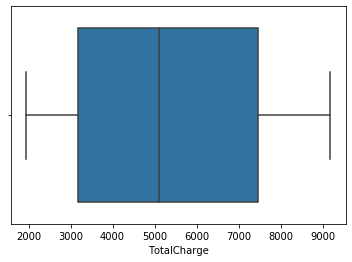

In [33]:
sns.boxplot(df['TotalCharge'])

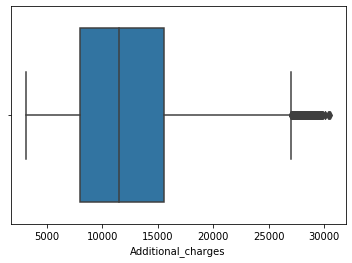

In [34]:
sns.boxplot(df['Additional_charges'])

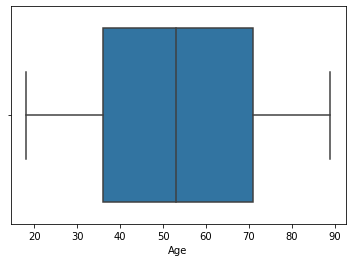

In [35]:
sns.boxplot(df['Age'])

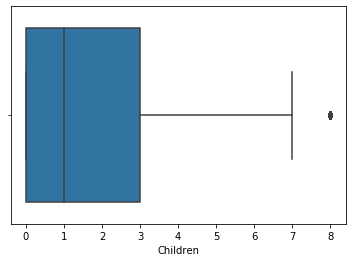

In [36]:
sns.boxplot(df['Children'])

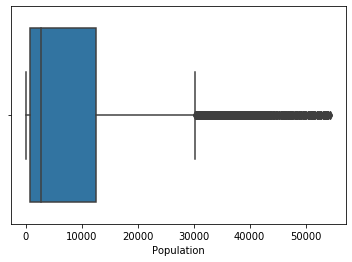

In [37]:
sns.boxplot(df['Population'])

In [38]:
# replace yes/no with 1/0 ReAdmis

df['ReAdmis'].replace(('Yes','No'), (1,0), inplace=True)

In [39]:
df.duplicated().sum()

0

### Step 4 : Look at correlation between variables

In [40]:
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Additional_charges,Timely_admis,Timely_treat,Timely_vis,Reliability,Options,Hours,Courteous,Listen,ReAdmis
CaseOrder,1.000000,0.010465,-0.012946,-0.012081,0.001489,0.017027,-0.003011,-0.012265,-0.015026,-0.006920,...,-0.003178,-0.016607,-0.005508,-0.006320,-0.016204,-0.004709,-0.006087,0.005102,-0.012319,0.661462
Zip,0.010465,1.000000,-0.084258,-0.913573,0.012947,0.014307,-0.003327,0.010507,-0.010747,0.000257,...,0.001545,-0.008630,-0.002475,-0.010277,0.001231,0.006290,-0.001406,-0.004203,-0.010159,0.009519
Lat,-0.012946,-0.084258,1.000000,0.001062,-0.187334,0.005874,-0.000132,-0.015414,-0.005158,0.004689,...,-0.001433,0.008075,0.009184,0.010924,-0.011577,0.000179,0.009542,0.009071,0.004348,-0.012324
Lng,-0.012081,-0.913573,0.001062,1.000000,-0.018263,-0.014141,0.002780,-0.008175,0.000931,0.002417,...,0.003290,0.011933,-0.002521,0.002614,0.000283,-0.002771,-0.004637,0.002070,0.003871,-0.004241
Population,0.001489,0.012947,-0.187334,-0.018263,1.000000,0.007810,-0.018884,0.002162,0.004719,0.016088,...,-0.011835,0.004194,0.016837,-0.004754,-0.008892,0.013720,0.007970,0.010529,-0.005522,0.007563
Children,0.017027,0.014307,0.005874,-0.014141,0.007810,1.000000,0.006050,0.003951,0.006542,-0.003467,...,0.014076,0.004097,0.006169,-0.002485,-0.001091,0.003409,-0.002796,0.015894,-0.011509,0.023890
Age,-0.003011,-0.003327,-0.000132,0.002780,-0.018884,0.006050,1.000000,-0.003218,0.008795,0.010819,...,0.716409,0.005614,0.004382,0.006990,0.003407,-0.013980,0.003434,0.009339,0.002873,0.011880
Income,-0.012265,0.010507,-0.015414,-0.008175,0.002162,0.003951,-0.003218,1.000000,-0.015684,0.011179,...,-0.005190,-0.004194,-0.012371,-0.007394,-0.003532,-0.005088,0.003083,0.008516,0.020238,-0.008669
VitD_levels,-0.015026,-0.010747,-0.005158,0.000931,0.004719,0.006542,0.008795,-0.015684,1.000000,0.010297,...,0.006120,0.010499,0.003697,-0.011930,-0.016650,0.007878,0.004610,-0.007461,-0.024347,0.002858
Doc_visits,-0.006920,0.000257,0.004689,0.002417,0.016088,-0.003467,0.010819,0.011179,0.010297,1.000000,...,0.014611,0.003984,0.004377,-0.003794,-0.006303,-0.011124,0.009226,0.005322,0.006145,-0.002226


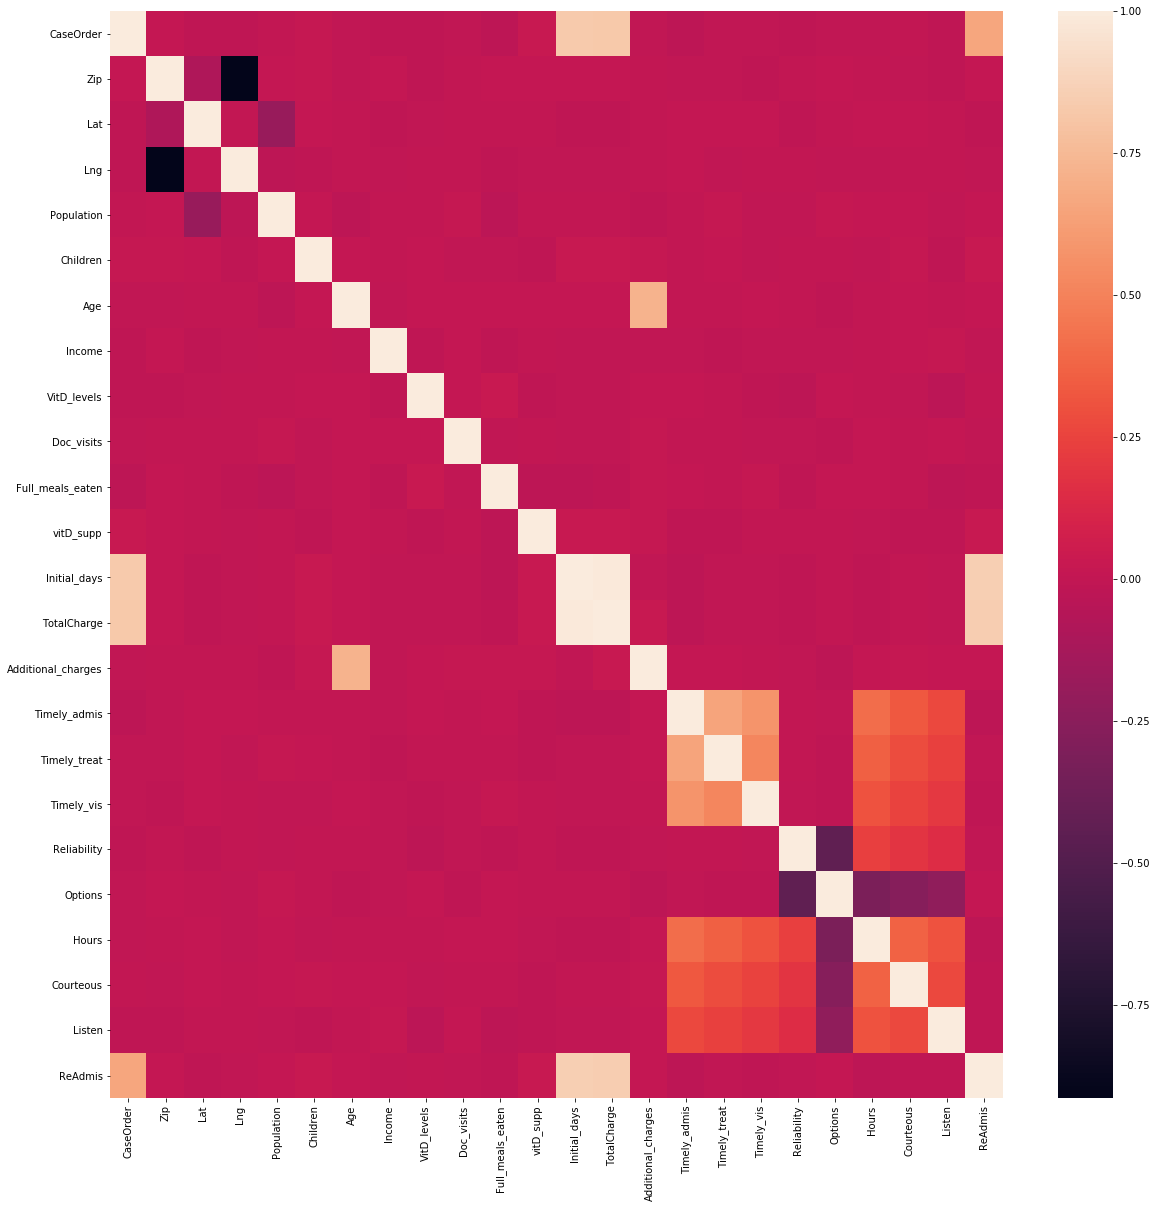

In [41]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

Text(0.5, 1, 'Variables correlating with ReAdmis Heatmap')

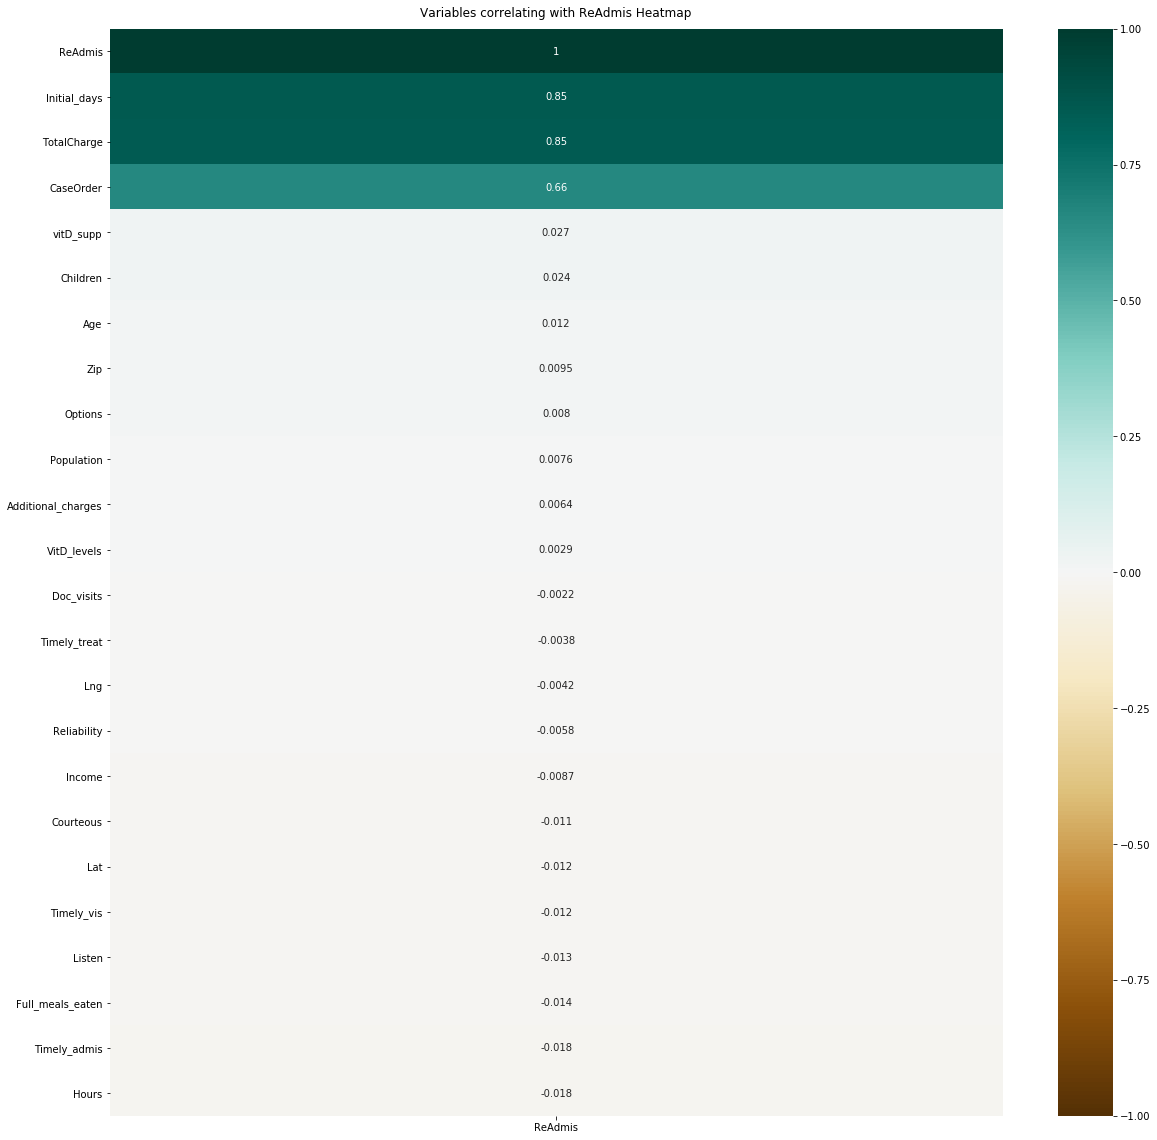

In [42]:
# Heatmap code reference (Seaborn.heatmap, N.d.)

plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr()[['ReAdmis']].sort_values(by='ReAdmis', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlating with ReAdmis Heatmap',pad=12)

### Step 5 : Create dummy variables (ensure n = k number of varibles) & rename any necessary features

In [43]:
#Get dummies code reference (Pandas.get_dummies, N.d.) 

df = pd.get_dummies(df, columns=['Children','Marital','Gender','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services'], drop_first=False)

In [44]:
df.rename(columns={'Services_CT Scan':'Services_CT_Scan','Marital_Never Married':'Marital_Never_Married','Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission','Initial_admin_Observation Admission':'Initial_admin_Observation_Admission'},inplace=True)

### Step 6 drop demographic features that won't be used in the analysis

In [45]:

df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Area','TimeZone','Job','Lng','Lat','Population'],axis=1, inplace=True)

### Step 7 Create variables y = ReAdmis, X = df with ReAdmis dropped.

In [46]:
y = df.ReAdmis 
X = df.drop(columns = 'ReAdmis')
X

,Zip,Age,Income,VitD_levels,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,35621,53,86575.93,19.141466,0,10.585770,3726.702860,17939.403420,3,3,...,0,1,1,0,0,1,1,0,0,0
1,32446,51,46805.99,18.940352,2,15.129562,4193.190458,17612.998120,3,4,...,1,0,0,1,1,0,0,0,1,0
2,57110,53,14370.14,18.057507,1,4.772177,2434.234222,17505.192460,2,4,...,1,0,1,0,1,0,1,0,0,0
3,56072,78,39741.49,16.576858,1,1.714879,2127.830423,12993.437350,3,5,...,1,0,0,1,0,1,1,0,0,0
4,23181,22,1209.56,17.439069,0,1.254807,2113.073274,3716.525786,2,1,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,27563,25,45967.61,16.980860,2,51.561220,6850.942000,8927.642000,3,2,...,1,0,0,1,1,0,0,0,1,0
9996,8340,87,14983.02,18.177020,0,68.668240,7741.690000,28507.150000,3,3,...,1,0,1,0,0,1,0,1,0,0
9997,37171,45,65917.81,17.129070,2,70.154180,8276.481000,15281.210000,3,3,...,0,1,1,0,1,0,0,0,1,0
9998,57775,43,29702.32,19.910430,2,63.356900,7644.483000,7781.678000,5,5,...,1,0,1,0,1,0,1,0,0,0


### Step 8 Min/Max scale features

In [47]:
#Min-Max scaling

X = (X - X.min()) / (X.max() - X.min())
X

,Zip,Age,Income,VitD_levels,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,0.353850,0.492958,0.686851,0.660419,0.00,0.135022,0.246933,0.539851,0.4,0.4,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.321761,0.464789,0.370773,0.646191,0.50,0.199037,0.311343,0.527956,0.4,0.6,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.571036,0.492958,0.112984,0.583732,0.25,0.053117,0.068475,0.524027,0.2,0.6,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.560545,0.845070,0.314627,0.478981,0.25,0.010044,0.026168,0.359607,0.4,0.8,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.228121,0.056338,0.008389,0.539980,0.00,0.003562,0.024130,0.021531,0.2,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.272409,0.098592,0.364110,0.507563,0.50,0.712308,0.678314,0.211438,0.4,0.2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9996,0.078126,0.971831,0.117855,0.592188,0.00,0.953321,0.801304,0.924967,0.4,0.4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,0.369516,0.380282,0.522667,0.518049,0.50,0.974256,0.875146,0.442979,0.4,0.4,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9998,0.577757,0.352113,0.234839,0.714821,0.50,0.878492,0.787882,0.169676,0.8,0.8,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Step 9 SelectKBest feature selection

In [48]:
# SelectKBest technique code reference (Bprasad26, 2022) and (Sklearn.feature_selection.SelectKBest, n.d.)

select_class = SelectKBest(k=10, score_func=chi2)
select_class.fit(X, y)
Xnew = select_class.transform(X)
print("Num Features before:", X.shape[1])
print("Num Features after:", Xnew.shape[1])

Num Features before: 78
Num Features after: 10


In [49]:
#Get column names for selected features

dfs = X.iloc[:,select_class.get_support()]
dfs

,Initial_days,TotalCharge,Children_1,Children_4,Children_6,Marital_Divorced,vitD_supp_1,vitD_supp_2,Services_CT_Scan,Services_Intravenous
0,0.135022,0.246933,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.199037,0.311343,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.053117,0.068475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010044,0.026168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003562,0.024130,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.712308,0.678314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9996,0.953321,0.801304,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,0.974256,0.875146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,0.878492,0.787882,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Step 10 ReJoin ReAdmis and Selected Features for prepared data set.


In [50]:

dfn = pd.concat([y, dfs], axis=1)

In [51]:
dfn.to_excel('C:/Users/ericy/Desktop/d209.1_prepared.xlsx')

### Step 11 Summary stats for selected features and ReAdmis

In [52]:
dfn

,ReAdmis,Initial_days,TotalCharge,Children_1,Children_4,Children_6,Marital_Divorced,vitD_supp_1,vitD_supp_2,Services_CT_Scan,Services_Intravenous
0,0,0.135022,0.246933,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.199037,0.311343,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.053117,0.068475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.010044,0.026168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.003562,0.024130,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.712308,0.678314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9996,1,0.953321,0.801304,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,1,0.974256,0.875146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,1,0.878492,0.787882,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [53]:
dfn.isnull().sum()

ReAdmis                 0
Initial_days            0
TotalCharge             0
Children_1              0
Children_4              0
Children_6              0
Marital_Divorced        0
vitD_supp_1             0
vitD_supp_2             0
Services_CT_Scan        0
Services_Intravenous    0
dtype: int64

In [54]:
dfn.describe()

,ReAdmis,Initial_days,TotalCharge,Children_1,Children_4,Children_6,Marital_Divorced,vitD_supp_1,vitD_supp_2,Services_CT_Scan,Services_Intravenous
count,9206.000000,9206.000000,9206.000000,9206.000000,9206.00000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000
mean,0.366935,0.470530,0.465055,0.256137,0.10189,0.019335,0.194330,0.269933,0.054204,0.122855,0.313383
std,0.481995,0.370886,0.301177,0.436522,0.30252,0.137708,0.395705,0.443949,0.226432,0.328288,0.463894
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.096921,0.171211,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.420396,0.436588,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.847510,0.762208,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
dfn.corr()

,ReAdmis,Initial_days,TotalCharge,Children_1,Children_4,Children_6,Marital_Divorced,vitD_supp_1,vitD_supp_2,Services_CT_Scan,Services_Intravenous
ReAdmis,1.000000,0.852064,0.845034,-0.025936,0.022959,0.015853,-0.021329,0.016839,0.018813,0.026087,-0.018757
Initial_days,0.852064,1.000000,0.987666,-0.035131,0.021351,0.016965,-0.024673,0.015574,0.016912,0.010723,-0.013546
TotalCharge,0.845034,0.987666,1.000000,-0.033019,0.021048,0.017821,-0.025384,0.016072,0.017946,0.013805,-0.014466
Children_1,-0.025936,-0.035131,-0.033019,1.000000,-0.197647,-0.082396,-0.008320,-0.000281,0.013395,0.004024,0.008071
Children_4,0.022959,0.021351,0.021048,-0.197647,1.000000,-0.047295,-0.001163,-0.005013,-0.017197,0.004116,0.009326
Children_6,0.015853,0.016965,0.017821,-0.082396,-0.047295,1.000000,-0.003171,-0.017855,0.001225,0.012332,0.000371
Marital_Divorced,-0.021329,-0.024673,-0.025384,-0.008320,-0.001163,-0.003171,1.000000,-0.014786,-0.007239,0.015231,-0.000971
vitD_supp_1,0.016839,0.015574,0.016072,-0.000281,-0.005013,-0.017855,-0.014786,1.000000,-0.145567,-0.002455,0.010679
vitD_supp_2,0.018813,0.016912,0.017946,0.013395,-0.017197,0.001225,-0.007239,-0.145567,1.000000,-0.000445,0.001678
Services_CT_Scan,0.026087,0.010723,0.013805,0.004024,0.004116,0.012332,0.015231,-0.002455,-0.000445,1.000000,-0.252837


In [56]:
dfn.mean()

ReAdmis                 0.366935
Initial_days            0.470530
TotalCharge             0.465055
Children_1              0.256137
Children_4              0.101890
Children_6              0.019335
Marital_Divorced        0.194330
vitD_supp_1             0.269933
vitD_supp_2             0.054204
Services_CT_Scan        0.122855
Services_Intravenous    0.313383
dtype: float64

In [57]:
dfn.median()

ReAdmis                 0.000000
Initial_days            0.420396
TotalCharge             0.436588
Children_1              0.000000
Children_4              0.000000
Children_6              0.000000
Marital_Divorced        0.000000
vitD_supp_1             0.000000
vitD_supp_2             0.000000
Services_CT_Scan        0.000000
Services_Intravenous    0.000000
dtype: float64

In [58]:
dfn.mode()

,ReAdmis,Initial_days,TotalCharge,Children_1,Children_4,Children_6,Marital_Divorced,vitD_supp_1,vitD_supp_2,Services_CT_Scan,Services_Intravenous
0,0.0,0.935755,0.775589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.976668,0.832094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5EDF95A08>,
      dtype=object)

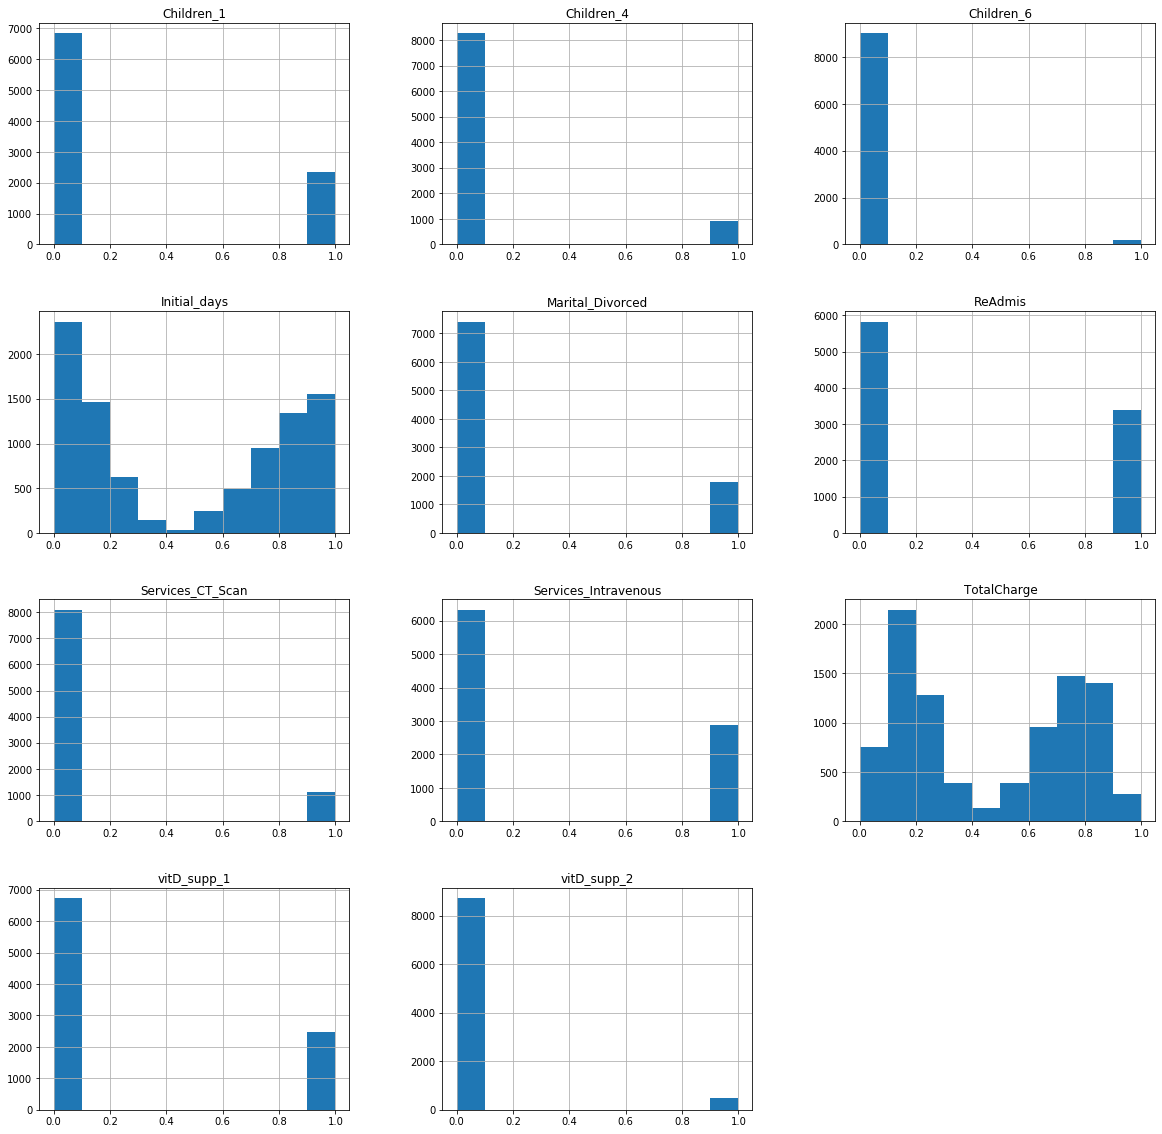

In [59]:
dfn.hist(figsize=(20,20))

In [60]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReAdmis               9206 non-null   int64  
 1   Initial_days          9206 non-null   float64
 2   TotalCharge           9206 non-null   float64
 3   Children_1            9206 non-null   float64
 4   Children_4            9206 non-null   float64
 5   Children_6            9206 non-null   float64
 6   Marital_Divorced      9206 non-null   float64
 7   vitD_supp_1           9206 non-null   float64
 8   vitD_supp_2           9206 non-null   float64
 9   Services_CT_Scan      9206 non-null   float64
 10  Services_Intravenous  9206 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 863.1 KB


### Step 12 .replace() and .astype() ReAdmis - ensure feature is binary categorical, int32

In [61]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReAdmis               9206 non-null   int64  
 1   Initial_days          9206 non-null   float64
 2   TotalCharge           9206 non-null   float64
 3   Children_1            9206 non-null   float64
 4   Children_4            9206 non-null   float64
 5   Children_6            9206 non-null   float64
 6   Marital_Divorced      9206 non-null   float64
 7   vitD_supp_1           9206 non-null   float64
 8   vitD_supp_2           9206 non-null   float64
 9   Services_CT_Scan      9206 non-null   float64
 10  Services_Intravenous  9206 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 863.1 KB


In [62]:
#dfn = pd.get_dummies(dfn, columns=['ReAdmis'])

dfn.astype({'ReAdmis': 'int8', 'Children_1':'int8','Children_4':'int8','Children_6':'int8','Marital_Divorced':'int8','vitD_supp_1':'int8','vitD_supp_2':'int8','Services_CT_Scan':'int8','Services_Intravenous':'int8'}).dtypes

ReAdmis                    int8
Initial_days            float64
TotalCharge             float64
Children_1                 int8
Children_4                 int8
Children_6                 int8
Marital_Divorced           int8
vitD_supp_1                int8
vitD_supp_2                int8
Services_CT_Scan           int8
Services_Intravenous       int8
dtype: object

In [63]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReAdmis               9206 non-null   int64  
 1   Initial_days          9206 non-null   float64
 2   TotalCharge           9206 non-null   float64
 3   Children_1            9206 non-null   float64
 4   Children_4            9206 non-null   float64
 5   Children_6            9206 non-null   float64
 6   Marital_Divorced      9206 non-null   float64
 7   vitD_supp_1           9206 non-null   float64
 8   vitD_supp_2           9206 non-null   float64
 9   Services_CT_Scan      9206 non-null   float64
 10  Services_Intravenous  9206 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 863.1 KB


### Step 13 Assign prepared features to y = ReAdmis, X = Prepared independent features.

In [63]:
y = dfn.ReAdmis 
X = dfn.drop(columns = 'ReAdmis')

### Step 14 import necessary libraries for KNN Classification 
### split data into test and train sets.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [65]:
#Stratify code reference (Parameter "stratify" from method "train_test_split" (scikit learn), n.d.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify=y)

In [66]:
X_train.to_excel('C:/Users/ericy/Desktop/d209.1.X_train.xlsx')

In [67]:
X_test.to_excel('C:/Users/ericy/Desktop/d209.1.X_test.xlsx')

In [68]:
y_train.to_excel('C:/Users/ericy/Desktop/d209.1.y_train.xlsx')

In [69]:
y_test.to_excel('C:/Users/ericy/Desktop/d209.1.y_test.xlsx')

# Section D: Data Analysis

In [70]:
# Import GridSearchCV for cross validation of model
# Code reference (Okamura, 2020).

paramgrid = {'n_neighbors': np.arange(1, 50)}
knc = KNeighborsClassifier()
knccv = GridSearchCV(knc , paramgrid, cv=5)

# Fit the model to training data.
knccv.fit(X_train, y_train)

print('The best n_neighbors for the model: {}'.format(knccv.best_params_))

The best n_neighbors for the model: {'n_neighbors': 4}


In [71]:
# Print ot the best score for classification model
print('The best classification score for the model: {:.6f}'.format(knccv.best_score_))

The best classification score for the model: 0.970981


In [72]:
# KneighborsClassifier code method reference (Klein, 2022)

knc = KNeighborsClassifier(n_neighbors=4)

knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [73]:
y_pred = knc.predict(X_test)

In [74]:
print('KNN model accuracy:', accuracy_score(y_test, y_pred))

KNN model accuracy: 0.9670528602461984


In [75]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1749
           1       0.96      0.94      0.95      1013

    accuracy                           0.97      2762
   macro avg       0.97      0.96      0.96      2762
weighted avg       0.97      0.97      0.97      2762



In [76]:

confmatrix = confusion_matrix(y_test, y_pred)
print(confmatrix)

[[1714   35]
 [  56  957]]


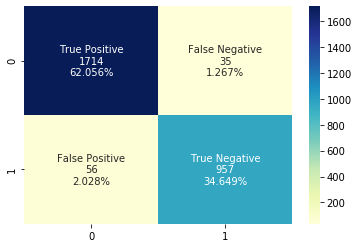

In [77]:
# Confusion matrix visualization reference (Aruchamy, 2021).

matnames = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
matcounts = ["{0:0.0f}".format(value) for value in confmatrix.flatten()]
matpercent = ["{0:.3%}".format(value) for value in confmatrix.flatten()/np.sum(confmatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(matnames, matcounts, matpercent)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confmatrix, annot=labels, fmt='', cmap='YlGnBu')

In [78]:
# Computing cross-val scores
# Code reference (Allwright, 2022)
crossauc = cross_val_score(knccv, X, y, cv=4)
print("Cross val scores computed using 4-fold cross-validation: {}".format(crossauc))

Cross val scores computed using 4-fold cross-validation: [0.97263249 0.97219809 0.97088223 0.53628857]


# Section E1

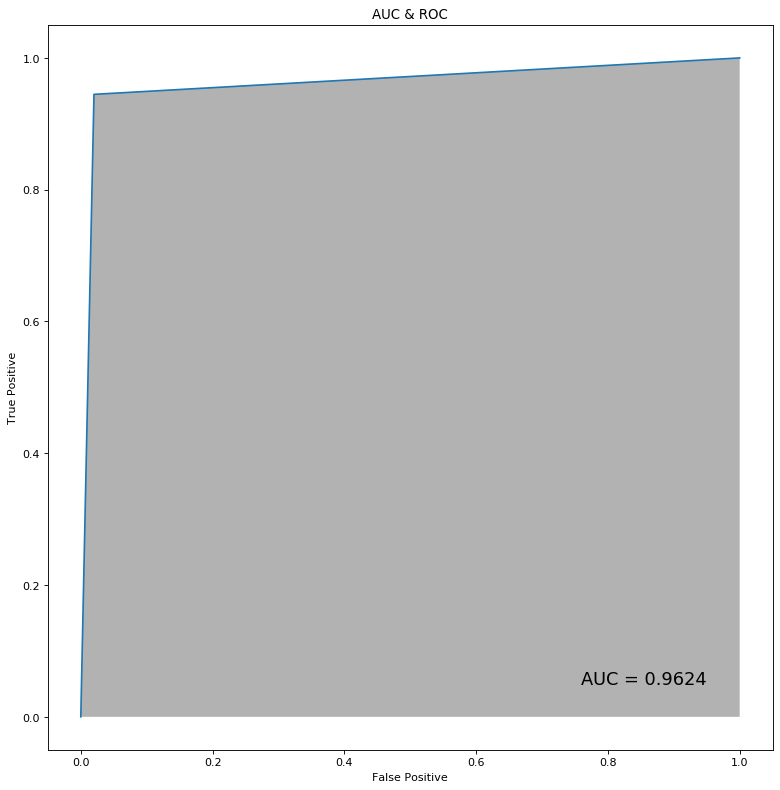

In [79]:
# AUC and ROC Curve
# code reference (Kharwal, 2022) and (Zach, 2021)
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)


plt.figure(figsize=(12, 12), dpi=80)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.axis('scaled')
plt.fill_between( false_positive_rate,true_positive_rate,facecolor='grey',alpha=0.6)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=16, weight='normal', color='black')

plt.title("AUC & ROC")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()